In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.feature_selection import SelectKBest, chi2
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('classifier_data.csv')

In [3]:
d

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,...,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,0,0,115.0410,True,2.0,0,61,1.0,319.5582,115.0408,...,0,1000.0,115.0408,20.4222,0.00,0.00,1,83.0852,0,0
1,0,0,140.6057,False,2.0,0,48,1.0,191.7349,140.6057,...,0,1000.0,140.6057,2.0227,0.00,0.00,2,255.6467,0,0
2,0,0,319.5580,True,2.0,0,58,1.0,319.5582,319.5409,...,0,1000.0,203.1909,59.7626,116.35,414.07,0,0.0000,0,1
3,0,0,57.5205,True,2.0,0,23,1.0,127.8233,57.5205,...,0,1000.0,57.5205,18.7323,0.00,0.00,1,134.2144,0,0
4,0,0,319.5582,True,2.0,0,25,1.0,319.5582,319.5436,...,0,1000.0,319.5436,220.4200,0.00,0.00,1,146.9966,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,3.0,2,37,0.0,3000.0000,3000.0000,...,0,1000.0,2308.1900,0.0000,0.00,0.00,0,0.0000,0,1
77390,1880,0,1120.0000,False,3.0,2,35,0.0,3000.0000,3000.0000,...,0,1000.0,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,0
77391,1975,0,525.0000,True,1.0,2,40,0.0,2500.0000,2500.0000,...,0,1000.0,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,1
77392,1840,0,1160.0000,False,4.0,0,47,1.0,3000.0000,3000.0000,...,0,1000.0,2257.5400,561.5300,0.00,0.00,1,500.0000,0,1


In [4]:
X=d.drop('Default',axis=1)
y=d['Default']

In [5]:
l=['NewCreditCustomer','LanguageCode',
 'UseOfLoan',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'Rating',
 'Restructured',
 'CreditScoreEsMicroL','Education','Rating']

In [6]:
X['EmploymentStatus'] = pd.Categorical(X.EmploymentStatus)
#d['RecoveryStage'] = pd.Categorical(d.RecoveryStage)
#d['ModelVersion'] = pd.Categorical(d.ModelVersion)
X['LanguageCode'] = pd.Categorical(X.LanguageCode)
X['Gender'] = pd.Categorical(X.Gender)
X['UseOfLoan'] = pd.Categorical(X.UseOfLoan)
X['Education'] = pd.Categorical(X.Education)
X['MaritalStatus'] = pd.Categorical(X.MaritalStatus)
X['VerificationType'] = pd.Categorical(X.VerificationType)
X['OccupationArea'] = pd.Categorical(X.OccupationArea)
X['HomeOwnershipType'] = pd.Categorical(X.HomeOwnershipType)
X['Restructured'] = pd.Categorical(X.Restructured)
X['EmploymentDurationCurrentEmployer']=pd.Categorical(X.EmploymentDurationCurrentEmployer)
X['CreditScoreEsMicroL']=pd.Categorical(X.CreditScoreEsMicroL)
X['Rating']=pd.Categorical(X.Rating)

In [7]:
char=X[l]


In [8]:
num = X.select_dtypes(exclude=['category','bool'])


In [9]:
X.dtypes

BidsPortfolioManager                         int64
BidsApi                                      int64
BidsManual                                 float64
NewCreditCustomer                             bool
VerificationType                          category
LanguageCode                              category
Age                                          int64
Gender                                    category
AppliedAmount                              float64
Amount                                     float64
Interest                                   float64
LoanDuration                                 int64
MonthlyPayment                             float64
UseOfLoan                                 category
Education                                 category
MaritalStatus                             category
EmploymentStatus                          category
EmploymentDurationCurrentEmployer         category
OccupationArea                            category
HomeOwnershipType              

In [10]:
num.isnull().mean()*100

BidsPortfolioManager                      0.0
BidsApi                                   0.0
BidsManual                                0.0
Age                                       0.0
AppliedAmount                             0.0
Amount                                    0.0
Interest                                  0.0
LoanDuration                              0.0
MonthlyPayment                            0.0
IncomeTotal                               0.0
ExistingLiabilities                       0.0
LiabilitiesTotal                          0.0
RefinanceLiabilities                      0.0
DebtToIncome                              0.0
FreeCash                                  0.0
MonthlyPaymentDay                         0.0
RecoveryStage                             0.0
CreditScoreEeMini                         0.0
PrincipalPaymentsMade                     0.0
InterestAndPenaltyPaymentsMade            0.0
PrincipalBalance                          0.0
InterestAndPenaltyBalance         

In [11]:
char.isnull().mean()*100

NewCreditCustomer                    0.0
LanguageCode                         0.0
UseOfLoan                            0.0
MaritalStatus                        0.0
EmploymentStatus                     0.0
EmploymentDurationCurrentEmployer    0.0
OccupationArea                       0.0
HomeOwnershipType                    0.0
Rating                               0.0
Restructured                         0.0
CreditScoreEsMicroL                  0.0
Education                            0.0
Rating                               0.0
dtype: float64

# Feature Selection for Numerical Features

In [12]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num), index=num.index, columns=num.columns).add_suffix('_Rank')
num_binned.head()

,BidsPortfolioManager_Rank,BidsApi_Rank,BidsManual_Rank,Age_Rank,AppliedAmount_Rank,Amount_Rank,Interest_Rank,LoanDuration_Rank,MonthlyPayment_Rank,IncomeTotal_Rank,...,MonthlyPaymentDay_Rank,RecoveryStage_Rank,CreditScoreEeMini_Rank,PrincipalPaymentsMade_Rank,InterestAndPenaltyPaymentsMade_Rank,PrincipalBalance_Rank,InterestAndPenaltyBalance_Rank,NoOfPreviousLoansBeforeLoan_Rank,AmountOfPreviousLoansBeforeLoan_Rank,PreviousEarlyRepaymentsCountBeforeLoan_Rank
0,0.0,0.0,3.0,9.0,0.0,0.0,4.0,0.0,5.0,9.0,...,8.0,0.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,3.0,7.0,0.0,0.0,2.0,0.0,5.0,9.0,...,6.0,0.0,1.0,3.0,0.0,1.0,1.0,2.0,0.0,0.0
2,0.0,0.0,5.0,9.0,0.0,0.0,2.0,1.0,5.0,9.0,...,8.0,0.0,1.0,3.0,2.0,1.0,3.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,5.0,9.0,...,6.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,5.0,1.0,0.0,0.0,4.0,0.0,5.0,9.0,...,8.0,0.0,1.0,4.0,4.0,1.0,1.0,1.0,0.0,0.0


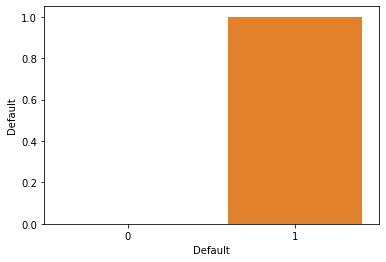

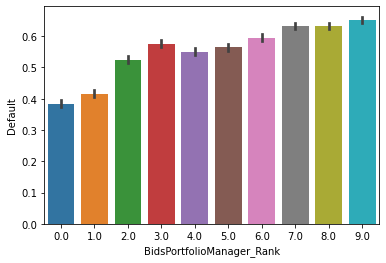

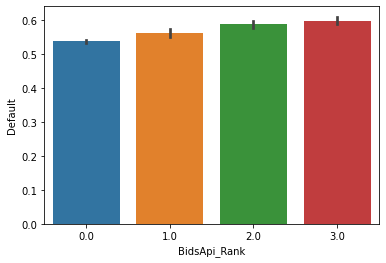

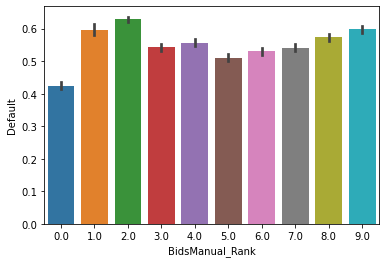

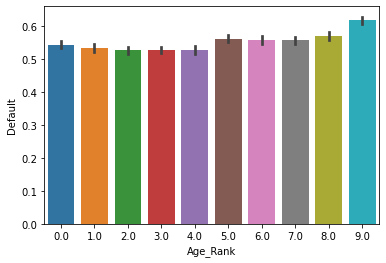

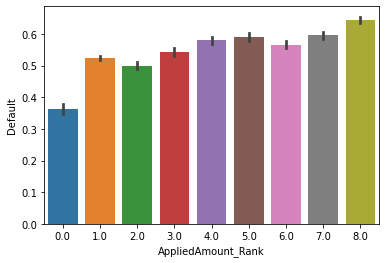

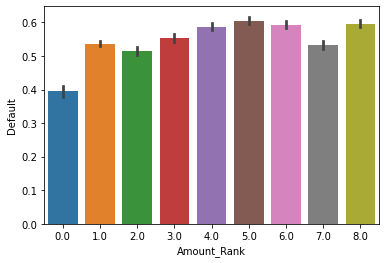

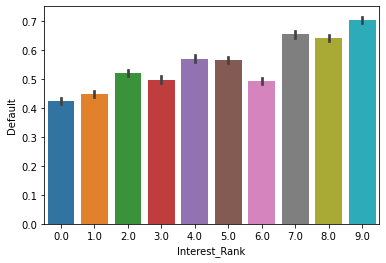

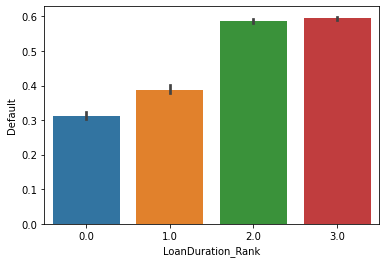

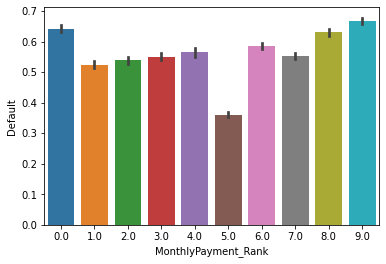

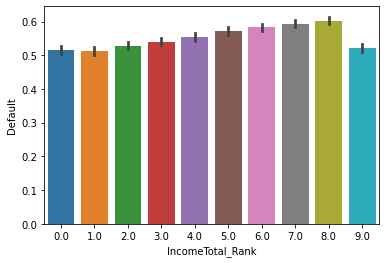

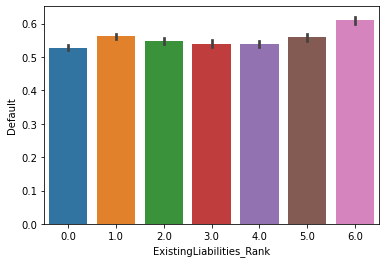

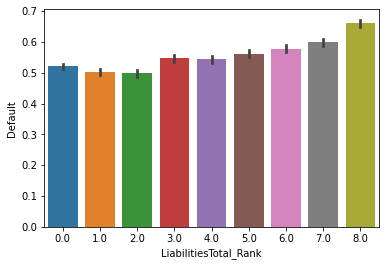

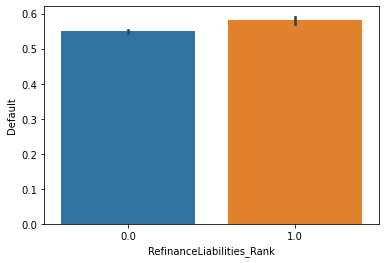

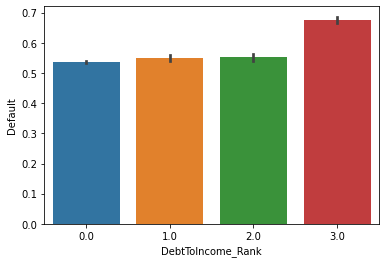

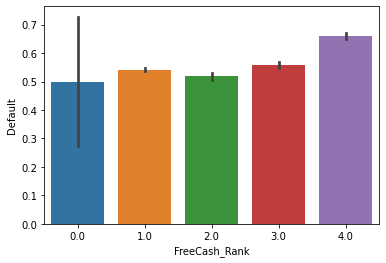

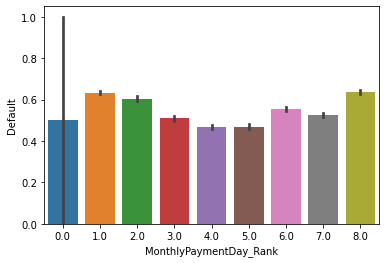

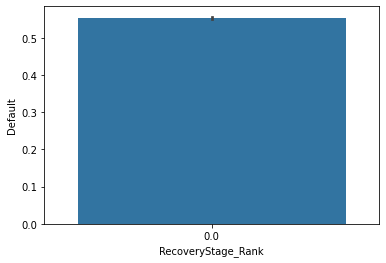

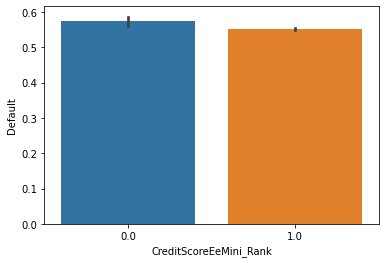

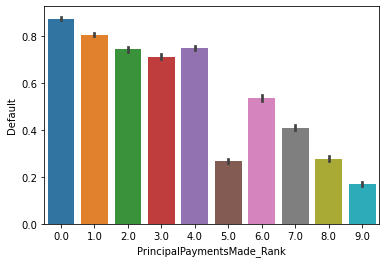

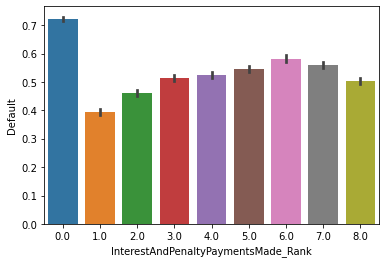

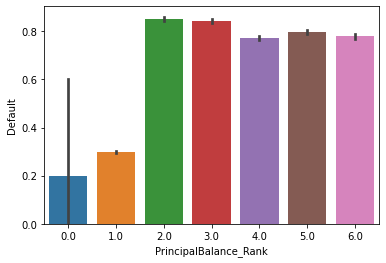

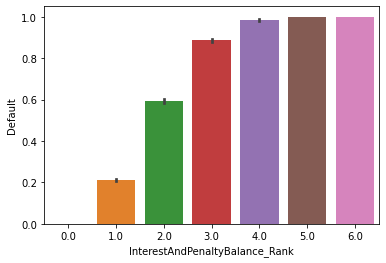

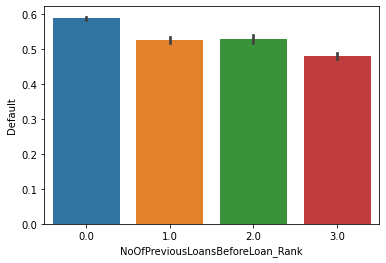

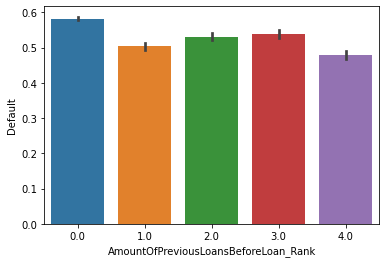

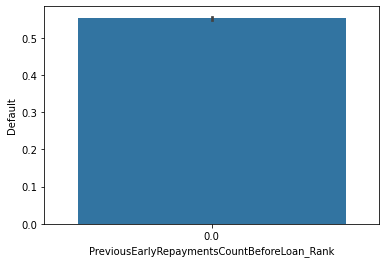

In [13]:
Xbinned = pd.concat([y, num_binned], join='inner', axis=1)
columnbinned = Xbinned.columns
for c in (columnbinned):
    plt.figure()
    sns.barplot(x=c, y='Default',data=Xbinned)
plt.show()

# Feature Selection for categorical Features

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

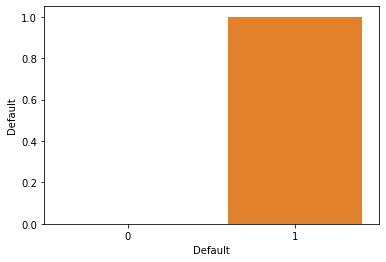

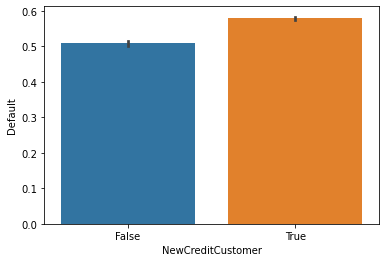

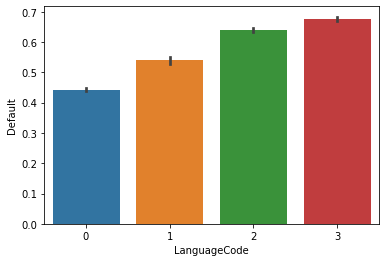

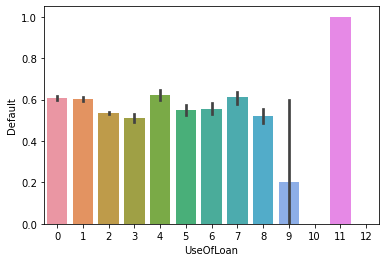

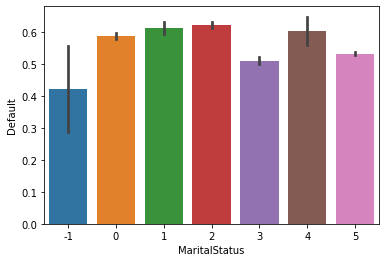

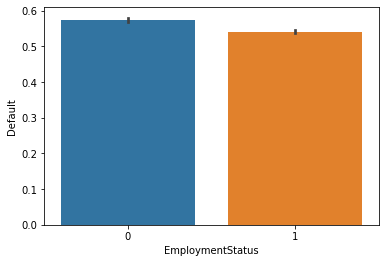

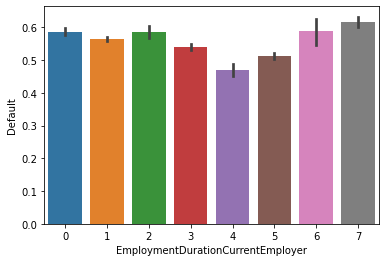

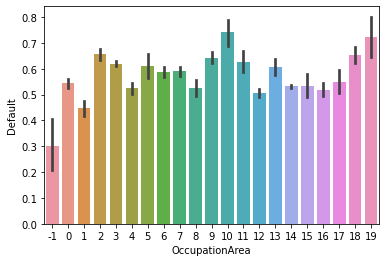

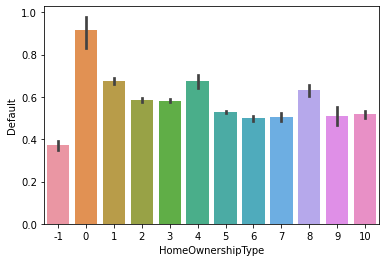

<Figure size 432x288 with 0 Axes>

In [14]:
Xchar = pd.concat([y, char], join='inner', axis=1)
columnChar = Xchar.columns
for c in (columnChar):
    plt.figure()
    sns.barplot(x=c, y='Default',data=Xchar)
plt.show()

In [ ]:
Xdum = pd.get_dummies(char, drop_first=True)

In [ ]:
selectorchar = SelectKBest(chi2, k=25)
Xnew = selectorchar.fit_transform(Xdum, y)
cols = selectorchar.get_support(indices=True)
charfeatures = Xdum.iloc[:,cols]

In [ ]:
Xallfea = pd.concat([num, charfeatures], axis=1, join='inner')
Xallfea

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix,precision_score
import catboost as ctb
X_train, X_test, y_train, y_test = train_test_split(Xallfea, y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

pred=clf.predict(X_test)

print(classification_report(y_test, pred))

In [ ]:
acc2=[]
depth=[12,13,14,15,20]
est = [500,550,600]
for i in range(len(est)):
    for j in range(len(depth)):
        print(est[i])
        print(depth[j])
        clf = GradientBoostingClassifier(n_estimators=est[i], learning_rate=1.0,max_depth=depth[i], random_state=0)
        clf.fit(X_train, y_train)
        acc2.append(clf.score(X_test, y_test))
        print(clf.score(X_test, y_test))

# RESULT

In [ ]:
from pretty_confusion_matrix import pp_matrix

In [ ]:
clf = GradientBoostingClassifier(n_estimators=550, learning_rate=1.0,max_depth=13, random_state=0)
clf.fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("ACCURACY SCORE:",accuracy_score(y_test,y_pred))
print("ROC_AUC CURVE",roc_auc_score(y_test,y_pred))

In [ ]:
feature_importances=pd.DataFrame({'importance' : clf.feature_importances_,'feature': X_train.columns})
feature_importances=feature_importances.sort_values('importance', ascending = False)
plt.figure(figsize=(10, 8))
sns.barplot(y = 'feature', x = 'importance', data = feature_importances)